# Lecture 10: Examples of use of AI in Bioeconomy

## Introduction
The **bioeconomy** is an economic system that leverages biological resources and processes to create sustainable solutions for global challenges. Artificial Intelligence (AI) has emerged as a critical tool in the bioeconomy, driving efficiency, innovation, and sustainability across various sectors.

---

## 1. Agriculture
#### Precision Farming
- **AI-Driven Monitoring**: Uses machine learning to analyze drone and satellite data for:
  - Crop health assessment
  - Early disease detection
  - Optimized irrigation scheduling
- **Yield Prediction**: Predicts crop yields based on weather, soil, and historical data.
- **Weed and Pest Control**: AI-powered robots identify and remove weeds or apply targeted pest control measures.

#### Practical Examples

Drone Imagery for Crop Monitoring

Use drones equipped with multispectral cameras to capture images of a field. These images are processed with AI algorithms to assess plant health, detect diseases, and measure water stress.

    Input: Multispectral images (visible and near-infrared wavelengths).
    AI Application: Machine learning algorithms analyze color indices (e.g., NDVI - Normalized Difference Vegetation Index) to identify unhealthy plants.
    Outcome: Farmers receive maps highlighting areas that need attention.

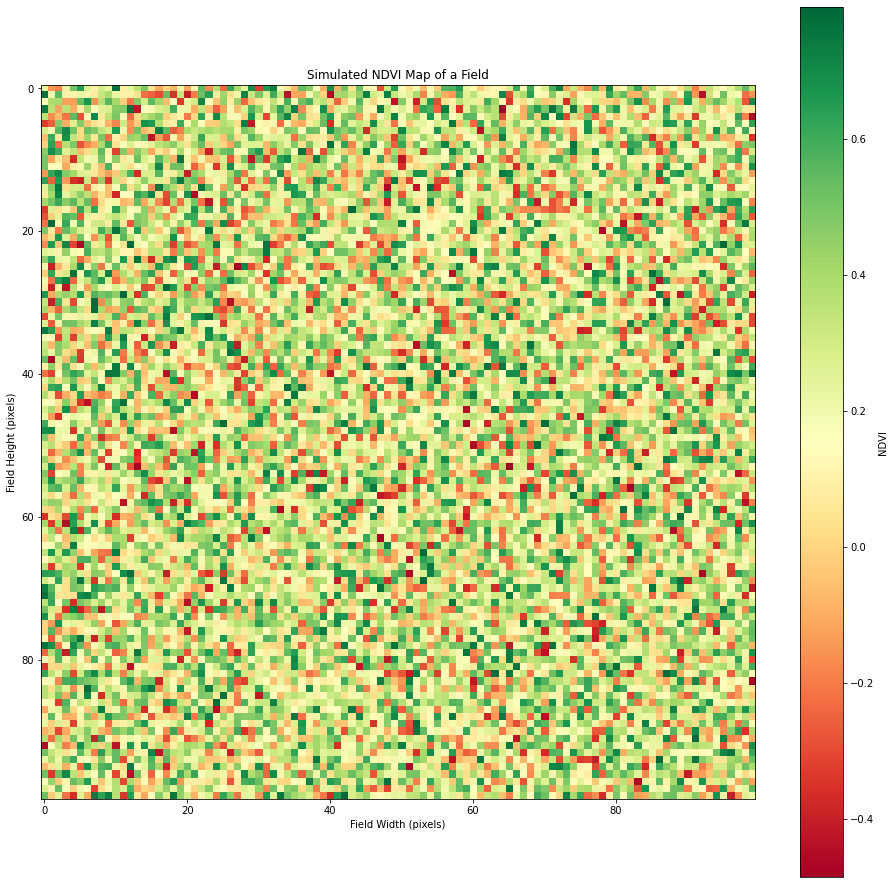

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic Red and NIR (Near-Infrared) bands
np.random.seed(42)  # For reproducibility
red_band = np.random.uniform(0.1, 0.6, (100, 100))  # Simulating red reflectance
nir_band = np.random.uniform(0.2, 0.9, (100, 100))  # Simulating near-infrared reflectance

# Calculate NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band)

# Visualize NDVI Map
plt.figure(figsize=(16, 16))
plt.imshow(ndvi, cmap='RdYlGn', interpolation='nearest')
plt.colorbar(label='NDVI')
plt.title('Simulated NDVI Map of a Field')
plt.xlabel('Field Width (pixels)')
plt.ylabel('Field Height (pixels)')
plt.show()


NDVI Map example: https://www.drought.gov/data-maps-tools/ndvi-greenness-maps
https://www.pix4d.com/blog/pix4dmapper-optimizing-the-ROI-of-fungicides-with-NDVI/

 AI-Driven Irrigation Management
 
Smart irrigation systems use AI to optimize water use by analyzing soil moisture, weather forecasts, and crop requirements.

    Input: Real-time data from soil moisture sensors and weather APIs.
    AI Application: Predictive models determine when and how much to irrigate.
    Outcome: Reduces water wastage and prevents over-irrigation

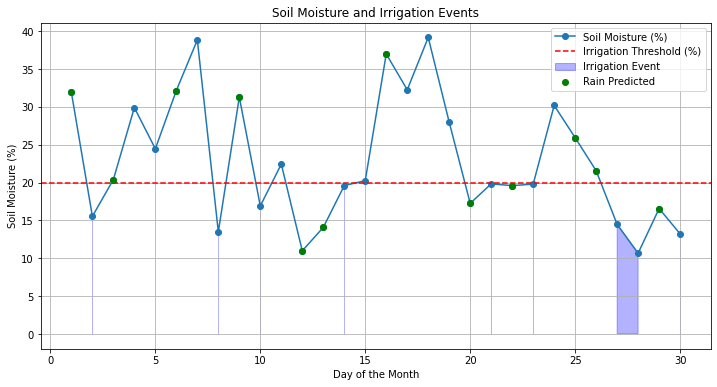

 Day  Soil Moisture (%)  Rain Prediction (1=Rain)  Irrigation (1=Yes)
   1          31.899949                         1                   0
   2          15.535360                         0                   1
   3          20.399191                         1                   0
   4          29.898419                         0                   0
   5          24.462680                         0                   0
   6          32.157131                         1                   0
   7          38.836237                         0                   0
   8          13.496401                         0                   1
   9          31.287031                         1                   0
  10          16.910325                         0                   1
  11          22.434302                         0                   0
  12          10.985882                         1                   0
  13          14.077221                         1                   0
  14          19.593

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic soil moisture data and weather predictions
days = np.arange(1, 31)  # Days of a month
soil_moisture = np.random.uniform(10, 40, size=len(days))  # Soil moisture levels in %
irrigation_threshold = 20  # Irrigation threshold in %
rain_prediction = np.random.choice([0, 1], size=len(days), p=[0.7, 0.3])  # 1 indicates rain

# Simulate irrigation decisions
irrigation = (soil_moisture < irrigation_threshold) & (rain_prediction == 0)

# Create DataFrame
data = pd.DataFrame({
    "Day": days,
    "Soil Moisture (%)": soil_moisture,
    "Rain Prediction (1=Rain)": rain_prediction,
    "Irrigation (1=Yes)": irrigation.astype(int)
})

# Plot Soil Moisture and Irrigation Events
plt.figure(figsize=(12, 6))
plt.plot(days, soil_moisture, label="Soil Moisture (%)", marker='o')
plt.axhline(irrigation_threshold, color='r', linestyle='--', label="Irrigation Threshold (%)")
plt.fill_between(days, 0, soil_moisture, where=irrigation, color='blue', alpha=0.3, label='Irrigation Event')
plt.scatter(days[rain_prediction == 1], soil_moisture[rain_prediction == 1], color='green', label="Rain Predicted", zorder=5)
plt.title('Soil Moisture and Irrigation Events')
plt.xlabel('Day of the Month')
plt.ylabel('Soil Moisture (%)')
plt.legend()
plt.grid()
plt.show()

# Display the data table
print(data.to_string(index=False))



### 2. Food Systems
#### Supply Chain Optimization
- **Demand Forecasting**: Reduces food waste by predicting consumption patterns.
- **Smart Logistics**: Optimizes transportation routes to lower energy use and emissions.


#### Food Safety
- AI detects contaminants and defects in food production lines.
- Models identify contamination sources in supply chains.

#### Alternative Proteins
- Accelerates development of lab-grown meat and plant-based proteins by simulating cellular growth and optimizing production.

#### Practical Examples

**Demand Forecasting** - a time series problem where the goal is to predict the future demand for a particular product.

    Input: past demand and exogenous variables
    AI Application: time series prediction
    Outcome: predicted demand to guide decision-making process

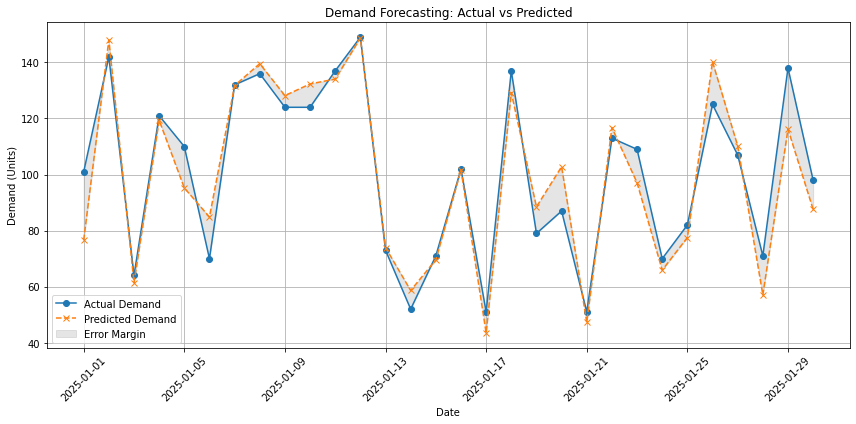

      Date  Actual Demand  Predicted Demand
2025-01-01            101         76.608942
2025-01-02            142        148.034412
2025-01-03             64         61.489560
2025-01-04            121        119.361329
2025-01-05            110         95.236703
2025-01-06             70         84.869810
2025-01-07            132        131.755448
2025-01-08            136        139.555513
2025-01-09            124        128.170111
2025-01-10            124        132.324619
2025-01-11            137        134.066009
2025-01-12            149        148.701614
2025-01-13             73         73.951258
2025-01-14             52         58.646543
2025-01-15             71         69.597815
2025-01-16            102        101.668066
2025-01-17             51         43.509235
2025-01-18            137        129.216180
2025-01-19             79         88.488429
2025-01-20             87        102.808506
2025-01-21             51         47.318291
2025-01-22            113       

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for daily demand
np.random.seed(42)
days = pd.date_range(start="2025-01-01", periods=30, freq="D")
actual_demand = np.random.randint(50, 150, size=len(days))  # Actual demand
predicted_demand = actual_demand + np.random.normal(0, 10, size=len(days))  # Predicted with AI

# Create DataFrame
data = pd.DataFrame({
    "Date": days,
    "Actual Demand": actual_demand,
    "Predicted Demand": predicted_demand
})

# Plot Actual vs Predicted Demand
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Actual Demand"], label="Actual Demand", marker="o", linestyle="-")
plt.plot(data["Date"], data["Predicted Demand"], label="Predicted Demand", marker="x", linestyle="--")
plt.fill_between(data["Date"], data["Actual Demand"], data["Predicted Demand"], alpha=0.2, color="gray", label="Error Margin")
plt.title("Demand Forecasting: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Demand (Units)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the data
print(data.to_string(index=False))


**Route Optimization** - a task where given a network of routes, the algorithm optimizes delivery routes to minimize the cost and the risk.

    Input: Routes schedule and transportation network
    AI task: optimization

In [4]:
import folium

# Define locations with their latitude and longitude
locations = {
    "Factory": (37.7749, -122.4194),  # San Francisco
    "Warehouse 1": (37.8044, -122.2711),  # Oakland
    "Warehouse 2": (37.6879, -122.4702),  # Daly City
    "Retailer 1": (37.7749, -122.4892),  # West San Francisco
    "Retailer 2": (37.7328, -122.5054)   # South San Francisco
}

# Define routes with distances (edges in the graph)
routes = [
    ("Factory", "Warehouse 1", 10),
    ("Factory", "Warehouse 2", 15),
    ("Warehouse 1", "Retailer 1", 8),
    ("Warehouse 1", "Retailer 2", 12),
    ("Warehouse 2", "Retailer 1", 10),
    ("Warehouse 2", "Retailer 2", 5)
]

# Define optimized route (e.g., AI-determined shortest path)
optimized_route = ["Factory", "Warehouse 2", "Retailer 2"]

# Initialize a folium map centered around the Factory
map_center = locations["Factory"]
supply_chain_map = folium.Map(location=map_center, zoom_start=12)

# Add all locations as markers
for location, coords in locations.items():
    folium.Marker(
        location=coords,
        popup=f"<b>{location}</b>",
        tooltip=location
    ).add_to(supply_chain_map)

# Draw all routes
for start, end, distance in routes:
    folium.PolyLine(
        [locations[start], locations[end]],
        color="gray",
        weight=2,
        tooltip=f"{start} to {end}: {distance} km"
    ).add_to(supply_chain_map)

# Highlight the optimized route
for i in range(len(optimized_route) - 1):
    folium.PolyLine(
        [locations[optimized_route[i]], locations[optimized_route[i + 1]]],
        color="red",
        weight=4,
        tooltip=f"Optimized: {optimized_route[i]} to {optimized_route[i + 1]}"
    ).add_to(supply_chain_map)

# Display the map
supply_chain_map.save("route_optimization_map.html")
supply_chain_map


### 3. Forestry
#### Sustainable Forest Management
- AI predicts forest growth and monitors illegal logging using satellite data.
- Optimizes timber harvesting while maintaining biodiversity.

#### Practical examples

For example, the task might be to predict:
1. Forest growth for harvesting optimization
2. Identify illegal logging locations

In [5]:
import folium
import numpy as np
from folium.plugins import HeatMap

# Define map center (example location: Amazon rainforest region)
map_center = [-3.4653, -62.2159]  # Latitude and Longitude of the Amazon region
forest_map = folium.Map(location=map_center, zoom_start=6)

# Generate synthetic forest growth data (random points with intensity values)
forest_growth_data = [
    [-3.5 + np.random.uniform(-0.5, 0.5), -62.2 + np.random.uniform(-0.5, 0.5), np.random.uniform(0.5, 1.0)]
    for _ in range(100)
]

# Add a heatmap layer for forest growth prediction
HeatMap(forest_growth_data, radius=15, blur=10, max_zoom=8, name="Forest Growth Prediction").add_to(forest_map)

# Add markers for illegal logging detections
illegal_logging_sites = [
    {"location": [-3.2, -62.1], "severity": "High"},
    {"location": [-3.6, -62.4], "severity": "Medium"},
    {"location": [-3.4, -62.3], "severity": "Low"}
]

for site in illegal_logging_sites:
    color = "red" if site["severity"] == "High" else "orange" if site["severity"] == "Medium" else "yellow"
    folium.Marker(
        location=site["location"],
        popup=f"Illegal Logging: {site['severity']} Severity",
        icon=folium.Icon(color=color, icon="tree")
    ).add_to(forest_map)

# Add polygons for optimized timber harvesting zones
optimized_harvest_zones = [
    [[-3.3, -62.5], [-3.3, -62.3], [-3.5, -62.3], [-3.5, -62.5]],  # Zone 1
    [[-3.6, -62.2], [-3.6, -62.0], [-3.8, -62.0], [-3.8, -62.2]]   # Zone 2
]

for zone in optimized_harvest_zones:
    folium.Polygon(
        locations=zone,
        color="green",
        fill=True,
        fill_color="green",
        fill_opacity=0.3,
        popup="Optimized Harvest Zone"
    ).add_to(forest_map)

# Add layer controls
folium.LayerControl().add_to(forest_map)

# Save and display the map
forest_map.save("sustainable_forest_management.html")
forest_map


C:\Users\kamil\AppData\Local\Temp\ipykernel_12524\4157862255.py:30: UserWarning: color argument of Icon should be one of: {'lightgreen', 'green', 'purple', 'beige', 'lightred', 'darkgreen', 'gray', 'blue', 'darkpurple', 'darkred', 'black', 'lightblue', 'cadetblue', 'darkblue', 'orange', 'pink', 'white', 'lightgray', 'red'}.
  icon=folium.Icon(color=color, icon="tree")


### 4. Energy and Biofuels
#### Biofuel Production Optimization
- AI improves microbial fermentation for higher biofuel yields.
- Predictive models reduce experimentation time for biofuel performance testing.

#### Energy Efficiency
- AI forecasts energy demands and integrates bioenergy production with grid systems.

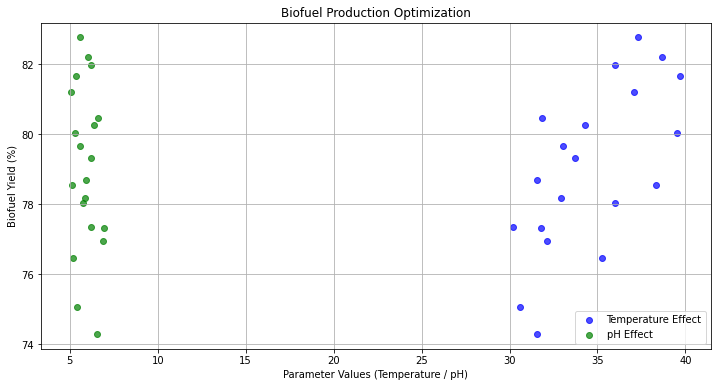

 Experiment  Temperature (°C)       pH  Biofuel Yield (%)
          1         33.745401 6.223706          79.335697
          2         39.507143 5.278988          80.034178
          3         37.319939 5.584289          82.770496
          4         35.986585 5.732724          78.037318
          5         31.560186 5.912140          78.696277
          6         31.559945 6.570352          74.295572
          7         30.580836 5.399348          75.061889
          8         38.661761 6.028469          82.224441
          9         36.011150 6.184829          81.975676
         10         37.080726 5.092901          81.218534
         11         30.205845 6.215090          77.362373
         12         39.699099 5.341048          81.660498
         13         38.324426 5.130103          78.553825
         14         32.123391 6.897771          76.960809
         15         31.818250 6.931264          77.314397
         16         31.834045 6.616795          80.455180
         17   

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data for microbial fermentation
np.random.seed(42)
experiments = np.arange(1, 21)  # 20 fermentation experiments
temperature = np.random.uniform(30, 40, size=len(experiments))  # Temperature in degrees Celsius
pH = np.random.uniform(5, 7, size=len(experiments))  # pH levels
yield_percentage = 80 + 0.5 * (temperature - 35) - 0.2 * (pH - 6)**2 + np.random.normal(0, 2, size=len(experiments))  # Simulated yield

# Combine into a DataFrame
data = pd.DataFrame({
    "Experiment": experiments,
    "Temperature (°C)": temperature,
    "pH": pH,
    "Biofuel Yield (%)": yield_percentage
})

# Visualize the optimization process
plt.figure(figsize=(12, 6))
plt.scatter(data["Temperature (°C)"], data["Biofuel Yield (%)"], c="blue", label="Temperature Effect", alpha=0.7)
plt.scatter(data["pH"], data["Biofuel Yield (%)"], c="green", label="pH Effect", alpha=0.7)
plt.title("Biofuel Production Optimization")
plt.xlabel("Parameter Values (Temperature / pH)")
plt.ylabel("Biofuel Yield (%)")
plt.legend()
plt.grid()
plt.show()

# Display the data table
print(data.to_string(index=False))


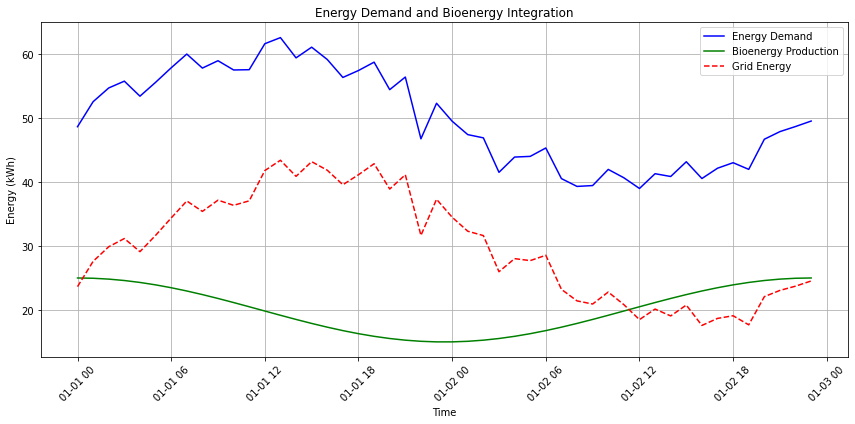

               Time  Energy Demand (kWh)  Bioenergy Production (kWh)  Grid Energy (kWh)
2025-01-01 00:00:00            48.646156                   25.000000          23.646156
2025-01-01 01:00:00            52.556222                   24.955387          27.600835
2025-01-01 02:00:00            54.703953                   24.822346          29.881607
2025-01-01 03:00:00            55.766453                   24.603249          31.163204
2025-01-01 04:00:00            53.417731                   24.302008          29.115723


In [7]:
# Generate synthetic data for energy demand and bioenergy production
time = pd.date_range(start="2025-01-01", periods=48, freq="H")  # 48 hours of data
energy_demand = 50 + 10 * np.sin(np.linspace(0, 2 * np.pi, len(time))) + np.random.normal(0, 2, len(time))  # kWh
bioenergy_production = 20 + 5 * np.cos(np.linspace(0, 2 * np.pi, len(time)))  # kWh
grid_energy = energy_demand - bioenergy_production  # Energy required from the grid

# Combine into a DataFrame
energy_data = pd.DataFrame({
    "Time": time,
    "Energy Demand (kWh)": energy_demand,
    "Bioenergy Production (kWh)": bioenergy_production,
    "Grid Energy (kWh)": grid_energy
})

# Visualize energy demand and bioenergy integration
plt.figure(figsize=(12, 6))
plt.plot(energy_data["Time"], energy_data["Energy Demand (kWh)"], label="Energy Demand", color="blue")
plt.plot(energy_data["Time"], energy_data["Bioenergy Production (kWh)"], label="Bioenergy Production", color="green")
plt.plot(energy_data["Time"], energy_data["Grid Energy (kWh)"], label="Grid Energy", color="red", linestyle="--")
plt.title("Energy Demand and Bioenergy Integration")
plt.xlabel("Time")
plt.ylabel("Energy (kWh)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the data table
print(energy_data.head().to_string(index=False))



### 5. Fisheries and Aquaculture
#### Smart Aquaculture
- AI monitors water quality, fish health, and feeding schedules.
- Detects early signs of disease in fish populations using image recognition.

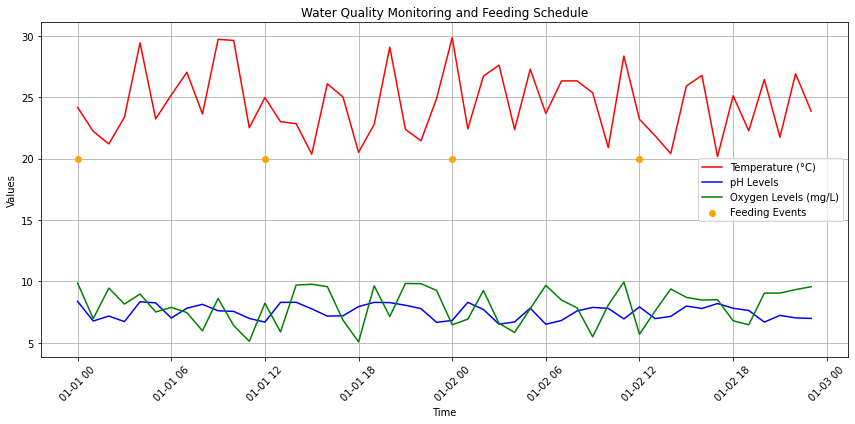

               Time  Temperature (°C)       pH  Oxygen Levels (mg/L)  Feeding Event
2025-01-01 00:00:00         24.174110 8.373460              9.865053           True
2025-01-01 01:00:00         22.221078 6.775042              6.965489          False
2025-01-01 02:00:00         21.198654 7.182133              9.460233          False
2025-01-01 03:00:00         23.376152 6.726947              8.155693          False
2025-01-01 04:00:00         29.429097 8.349387              8.974057          False


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate time-series data for 48 hours
time = pd.date_range(start="2025-01-01", periods=48, freq="H")

# Generate synthetic water quality parameters
temperature = np.random.uniform(20, 30, size=len(time))  # Temperature in °C
pH = np.random.uniform(6.5, 8.5, size=len(time))  # pH levels
oxygen_levels = np.random.uniform(5, 10, size=len(time))  # Oxygen levels in mg/L

# Feeding schedule (e.g., feeding events at specific intervals)
feeding_schedule = [(i % 12 == 0) for i in range(len(time))]  # Feeding every 12 hours

# Combine into a DataFrame
aquaculture_data = pd.DataFrame({
    "Time": time,
    "Temperature (°C)": temperature,
    "pH": pH,
    "Oxygen Levels (mg/L)": oxygen_levels,
    "Feeding Event": feeding_schedule
})

# Plot water quality parameters and feeding events
plt.figure(figsize=(12, 6))
plt.plot(aquaculture_data["Time"], aquaculture_data["Temperature (°C)"], label="Temperature (°C)", color="red")
plt.plot(aquaculture_data["Time"], aquaculture_data["pH"], label="pH Levels", color="blue")
plt.plot(aquaculture_data["Time"], aquaculture_data["Oxygen Levels (mg/L)"], label="Oxygen Levels (mg/L)", color="green")
plt.scatter(aquaculture_data["Time"][feeding_schedule], [20] * sum(feeding_schedule), color="orange", label="Feeding Events", zorder=5)
plt.title("Water Quality Monitoring and Feeding Schedule")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the first few rows of the data
print(aquaculture_data.head().to_string(index=False))


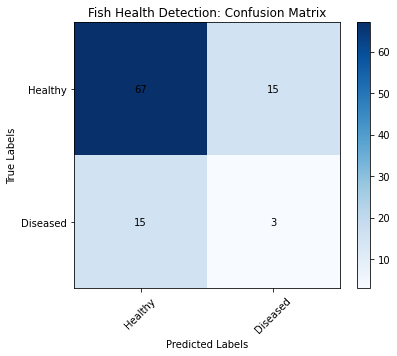

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.17      0.17      0.17        18
    Diseased       0.82      0.82      0.82        82

    accuracy                           0.70       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.70      0.70      0.70       100



In [9]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Simulate a dataset for fish health detection
np.random.seed(42)
true_labels = np.random.choice(["Healthy", "Diseased"], size=100, p=[0.8, 0.2])
predicted_labels = np.random.choice(["Healthy", "Diseased"], size=100, p=[0.85, 0.15])

# Generate a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=["Healthy", "Diseased"])
labels = ["Healthy", "Diseased"]

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Fish Health Detection: Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Add text annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

# Display a classification report
report = classification_report(true_labels, predicted_labels, target_names=labels)
print("Classification Report:\n", report)


### 6. Biomaterials and Biomanufacturing
#### Material Discovery
- Accelerates discovery of sustainable biomaterials like bioplastics.
- Simulates and predicts the performance of bio-based composites.

#### Process Optimization
- AI enhances efficiency in biomanufacturing processes, such as optimizing enzymes and microbial pathways.

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate material properties
np.random.seed(42)
num_samples = 100
materials = [f"Material_{i}" for i in range(1, num_samples + 1)]
density = np.random.uniform(0.8, 1.5, num_samples)  # g/cm^3
tensile_strength = np.random.uniform(20, 100, num_samples)  # MPa
flexibility = np.random.uniform(0.1, 0.9, num_samples)  # Ratio
biodegradability = np.random.uniform(0.5, 1.0, num_samples)  # Ratio

# Simulate a composite "Performance Score"
performance_score = (
    0.4 * tensile_strength + 0.3 * biodegradability + 0.2 * flexibility - 0.1 * density
)
performance_score = (performance_score - performance_score.min()) / (
    performance_score.max() - performance_score.min()
)  # Normalize to 0-1 scale

# Combine into a DataFrame
material_data = pd.DataFrame({
    "Material": materials,
    "Density (g/cm^3)": density,
    "Tensile Strength (MPa)": tensile_strength,
    "Flexibility": flexibility,
    "Biodegradability": biodegradability,
    "Performance Score": performance_score,
})

# Display the first few rows
print("Sample data:")
print(material_data.head())


Sample data:
     Material  Density (g/cm^3)  Tensile Strength (MPa)  Flexibility  \
0  Material_1          1.062178               22.514335     0.613625   
1  Material_2          1.465500               70.912833     0.167312   
2  Material_3          1.312396               45.148478     0.229303   
3  Material_4          1.219061               60.685655     0.818843   
4  Material_5          0.909213               92.605318     0.585143   

   Biodegradability  Performance Score  
0          0.525841           0.022579  
1          0.765677           0.642218  
2          0.770318           0.312310  
3          0.818715           0.516375  
4          0.863046           0.926179  


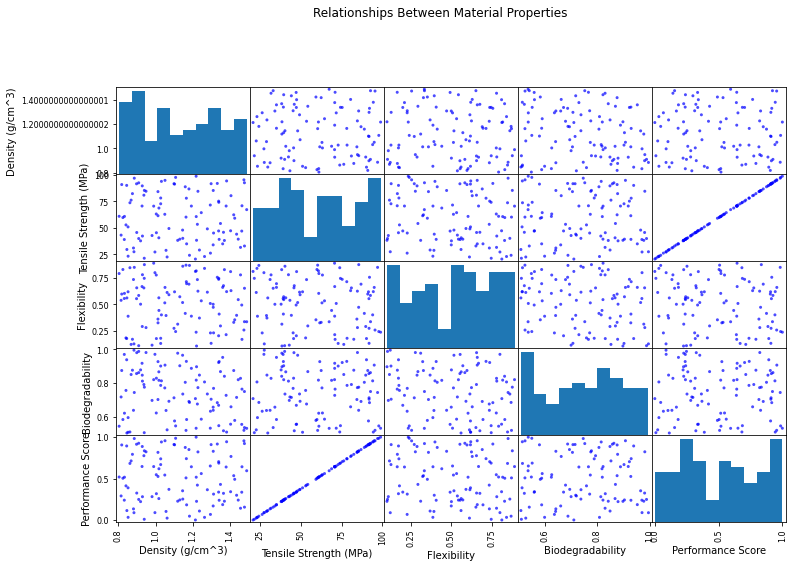

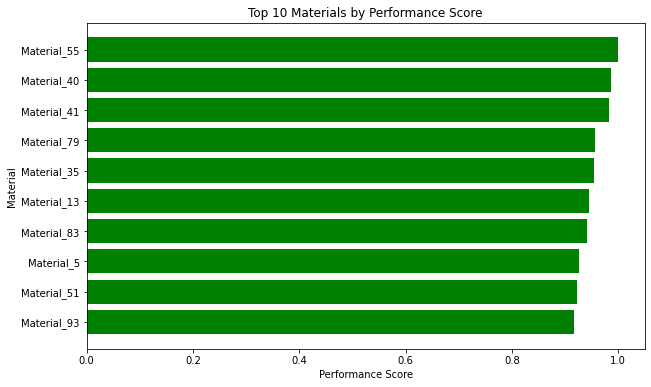

In [11]:
# Pairwise scatter plots to analyze material properties
pd.plotting.scatter_matrix(
    material_data[["Density (g/cm^3)", "Tensile Strength (MPa)", "Flexibility", "Biodegradability", "Performance Score"]],
    figsize=(12, 8),
    alpha=0.7,
    diagonal="hist",
    color="blue",
)
plt.suptitle("Relationships Between Material Properties", y=1.02)
plt.show()

# Top materials based on performance
top_materials = material_data.sort_values(by="Performance Score", ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_materials["Material"], top_materials["Performance Score"], color="green")
plt.xlabel("Performance Score")
plt.ylabel("Material")
plt.title("Top 10 Materials by Performance Score")
plt.gca().invert_yaxis()
plt.show()


Mean Squared Error: 0.0001
R-squared Score: 0.9987


C:\Users\kamil\AppData\Local\Temp\ipykernel_12524\1379572060.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2, color="red")


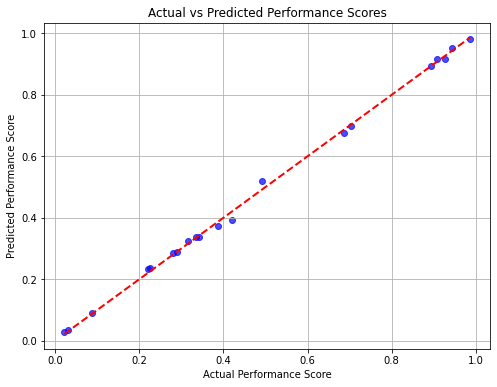

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features and target
X = material_data[["Density (g/cm^3)", "Tensile Strength (MPa)", "Flexibility", "Biodegradability"]]
y = material_data["Performance Score"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Plot actual vs predicted performance scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2, color="red")
plt.title("Actual vs Predicted Performance Scores")
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.grid()
plt.show()


### 7. Circular Bioeconomy
#### Waste Valorization
- AI optimizes the conversion of agricultural and organic waste into bioenergy, biochemicals, and fertilizers.
- Predicts the best reuse and recycling strategies for bio-based products.



In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Simulate waste data
np.random.seed(42)
num_samples = 100
waste_type = np.random.choice(["Agricultural", "Organic", "Industrial"], num_samples)
waste_quantity = np.random.uniform(1, 10, num_samples)  # in tons
energy_potential = np.random.uniform(5, 15, num_samples)  # in MJ/kg
nutrient_content = np.random.uniform(0.1, 1.0, num_samples)  # in %
degradation_rate = np.random.uniform(0.05, 0.5, num_samples)  # in fraction

# Simulate valorization strategy labels
strategies = ["Bioenergy", "Biochemicals", "Fertilizers"]
valorization_strategy = np.random.choice(strategies, num_samples)

# Combine into a DataFrame
waste_data = pd.DataFrame({
    "Waste Type": waste_type,
    "Quantity (tons)": waste_quantity,
    "Energy Potential (MJ/kg)": energy_potential,
    "Nutrient Content (%)": nutrient_content,
    "Degradation Rate": degradation_rate,
    "Valorization Strategy": valorization_strategy,
})

# Display first few rows
print("Sample waste data:")
print(waste_data.head())


Sample waste data:
     Waste Type  Quantity (tons)  Energy Potential (MJ/kg)  \
0    Industrial         2.788441                  5.165878   
1  Agricultural         1.049699                 10.120931   
2    Industrial         8.339153                  7.264958   
3    Industrial         7.361716                 11.451728   
4  Agricultural         7.561065                  6.743664   

   Nutrient Content (%)  Degradation Rate Valorization Strategy  
0              0.829102          0.058200             Bioenergy  
1              0.880365          0.092499             Bioenergy  
2              0.921916          0.357353           Fertilizers  
3              0.560208          0.082035             Bioenergy  
4              0.551365          0.193539          Biochemicals  


C:\Users\kamil\AppData\Local\Temp\ipykernel_12524\984286448.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=waste_data, x="Waste Type", palette="coolwarm")


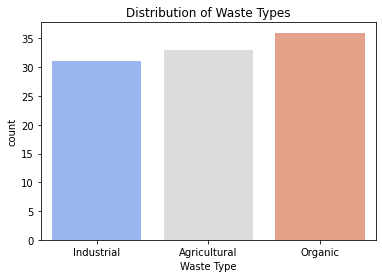

C:\Users\kamil\AppData\Local\Temp\ipykernel_12524\984286448.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=waste_data, x="Valorization Strategy", y="Energy Potential (MJ/kg)", palette="Set2")


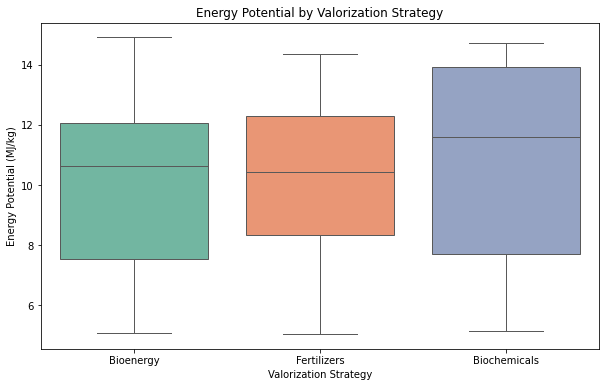

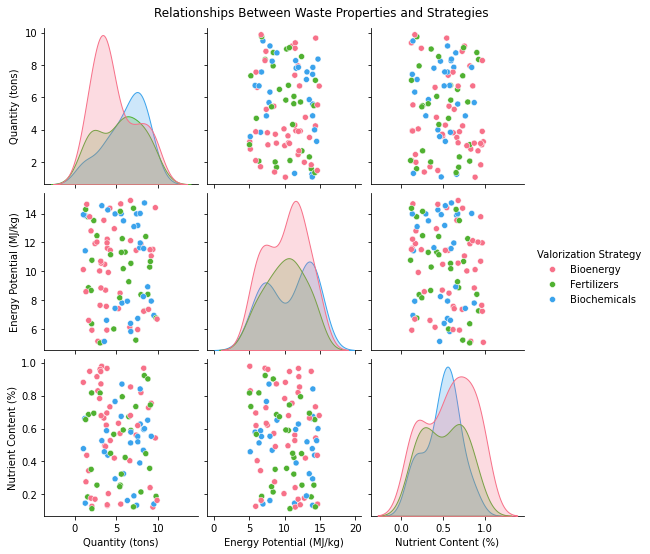

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for waste type
plt.figure(figsize=(6, 4))
sns.countplot(data=waste_data, x="Waste Type", palette="coolwarm")
plt.title("Distribution of Waste Types")
plt.show()

# Boxplot for waste properties grouped by valorization strategy
plt.figure(figsize=(10, 6))
sns.boxplot(data=waste_data, x="Valorization Strategy", y="Energy Potential (MJ/kg)", palette="Set2")
plt.title("Energy Potential by Valorization Strategy")
plt.show()

# Pairplot for numeric features
sns.pairplot(waste_data, hue="Valorization Strategy", vars=["Quantity (tons)", "Energy Potential (MJ/kg)", "Nutrient Content (%)"], palette="husl")
plt.suptitle("Relationships Between Waste Properties and Strategies", y=1.02)
plt.show()


Classification Report:
              precision    recall  f1-score   support

Biochemicals       0.29      0.33      0.31         6
   Bioenergy       0.50      0.25      0.33        12
 Fertilizers       0.14      0.50      0.22         2

    accuracy                           0.30        20
   macro avg       0.31      0.36      0.29        20
weighted avg       0.40      0.30      0.31        20



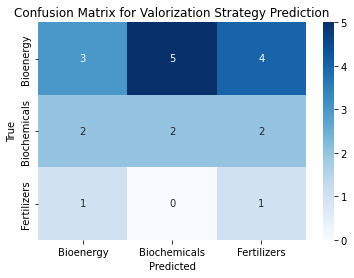

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Encode categorical labels
waste_data_encoded = pd.get_dummies(waste_data, columns=["Waste Type"], drop_first=True)
X = waste_data_encoded[["Quantity (tons)", "Energy Potential (MJ/kg)", "Nutrient Content (%)", "Degradation Rate"] + [col for col in waste_data_encoded.columns if "Waste Type" in col]]
y = waste_data["Valorization Strategy"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=strategies)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=strategies, yticklabels=strategies)
plt.title("Confusion Matrix for Valorization Strategy Prediction")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


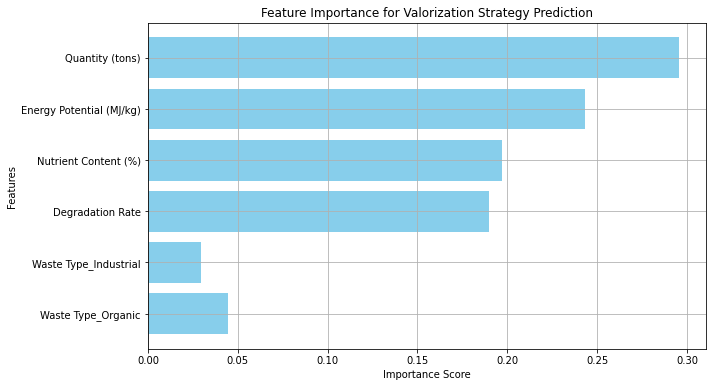

In [16]:
# Feature importance visualization
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color="skyblue")
plt.title("Feature Importance for Valorization Strategy Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.grid()
plt.show()


## Real-life example on actual data

Let's do some real application using real-life data.

    UCI Machine Learning Repository: Contains water quality datasets for rivers, lakes, and oceans.
    


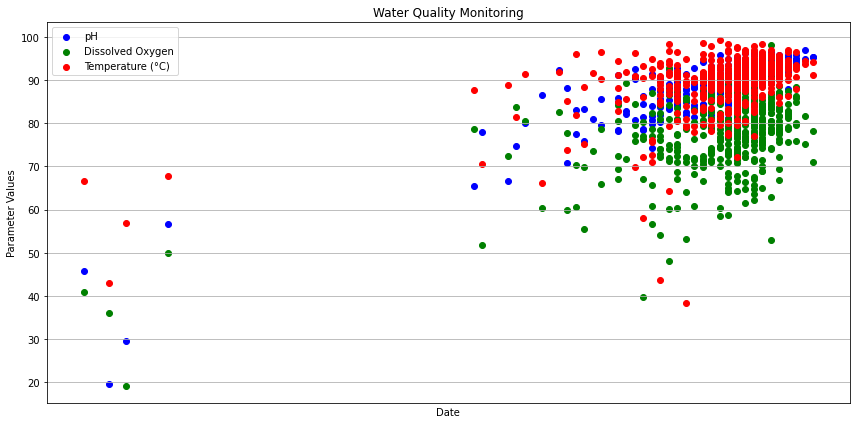

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the UCI Water Quality dataset (example dataset: water-treatment.csv)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data"
column_names = ["Date", "Flow", "pH", "Oxygen", "Temperature", "Conductivity"]
water_data = pd.read_csv(url, header=None, names=column_names, sep=",", na_values="?")

# Select relevant columns and clean data
water_data = water_data[["Date", "pH", "Oxygen", "Temperature"]].dropna()

# Convert dates if needed
water_data["Date"] = pd.to_datetime(water_data["Date"], errors="coerce")

# Plot the water quality parameters
plt.figure(figsize=(12, 6))
plt.scatter(water_data["Date"], water_data["pH"], label="pH", color="blue")
plt.scatter(water_data["Date"], water_data["Oxygen"], label="Dissolved Oxygen", color="green")
plt.scatter(water_data["Date"], water_data["Temperature"], label="Temperature (°C)", color="red")
plt.title("Water Quality Monitoring")
plt.xlabel("Date")
plt.ylabel("Parameter Values")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data"
column_names = [
    "Date", "Flow", "pH", "Oxygen", "Temperature", "Conductivity",
    "Nitrate", "BOD", "COD", "Total Nitrogen", "Total Phosphorus", "Suspended Solids"
]
water_data = pd.read_csv(url, header=None, names=column_names, sep=",", na_values="?")

# Select relevant columns and clean data
water_data = water_data[["Flow", "pH", "Oxygen", "Temperature", "Conductivity"]].dropna()

# Display first few rows
print("Sample data:")
print(water_data.head())


Sample data:
                                                                                                                                                 Flow  \
D-5/3/90  35023.0 3.5 7.9 205.0 588.0 192.0 65.6 4.5 2430 7.8 236.0 268 73.1 8.5 2280 7.8 158.0 376.0 96.0  77.1 0.4 2060 7.6 20.0  104.0 20.0   0.00   
D-11/3/90 29156.0 2.5 7.7 206.0 451.0 194.0 69.1 4.5 1249 7.7 206.0 220 61.8 4.0 1219 7.7 111.0 282.0 124.0 77.4 0.3 1233 7.5 16.0  118.0 19.0   0.03   
D-12/3/90 39246.0 2.0 7.8 172.0 506.0 200.0 69.0 5.0 1865 7.8 208.0 248 66.1 6.5 1929 7.8 164.0 463.0 100.0 78.0 0.6 1825 7.6 19.0  157.0 27.0   0.02   
D-13/3/90 42393.0 0.7 7.9 189.0 478.0 230.0 67.0 5.5 1410 8.1 173.0 192 62.5 5.0 1406 7.7 172.0 412.0 104.0 71.2 0.4 1562 7.6 152.0 306.0 131.0  3.50   
D-14/3/90 42857.0 1.5 7.7 238.0 319.0 292.0 33.8 3.5 1261 7.6 170.0 268 31.3 4.2 1204 7.6 116.0 276.0 104.0 51.9 0.3 1261 7.4 320.0 350.0 238.0  2.00   

                                                                    

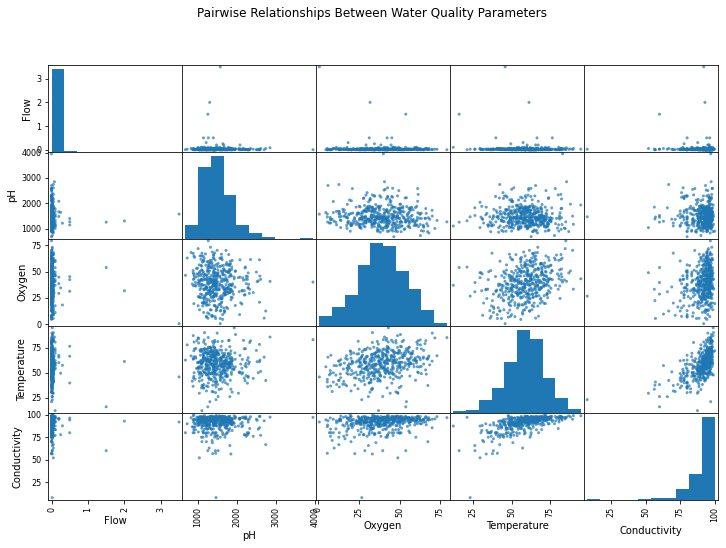

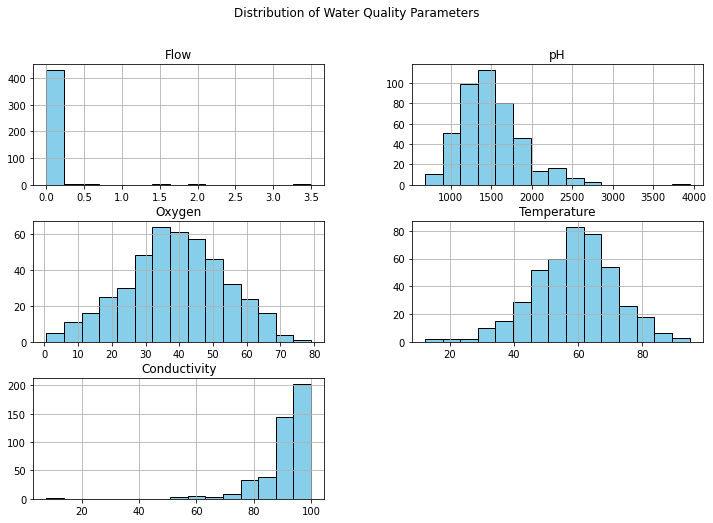

In [19]:
import matplotlib.pyplot as plt

# Pairwise scatter plot to visualize relationships
pd.plotting.scatter_matrix(water_data, figsize=(12, 8), alpha=0.7)
plt.suptitle("Pairwise Relationships Between Water Quality Parameters")
plt.show()

# Plot parameter distributions
water_data.hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Water Quality Parameters")
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into features and target variable
X = water_data[["Temperature", "pH", "Conductivity"]]
y = water_data["Oxygen"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 208.28
R-squared Score: -0.01


C:\Users\kamil\AppData\Local\Temp\ipykernel_12524\3845146598.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2, color="red")


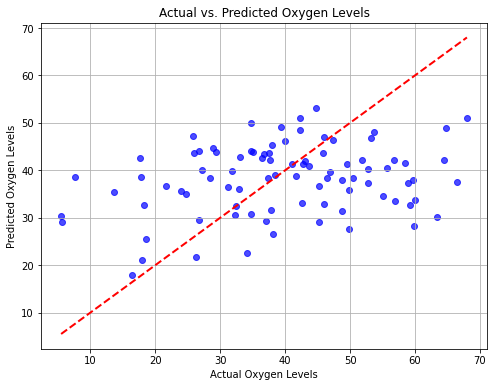

In [21]:
# Scatter plot of actual vs. predicted oxygen levels
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2, color="red")
plt.title("Actual vs. Predicted Oxygen Levels")
plt.xlabel("Actual Oxygen Levels")
plt.ylabel("Predicted Oxygen Levels")
plt.grid()
plt.show()


**Abnormal Oxygen levels in the water**

Let's get another dataset where we will try to detect abnormal levels of oxygen in a water treatment plant

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data"
column_names = [
    "Date", "Flow", "pH", "Oxygen", "Temperature", "Conductivity",
    "Nitrate", "BOD", "COD", "Total Nitrogen", "Total Phosphorus", "Suspended Solids"
]
water_data = pd.read_csv(url, header=None, names=column_names, sep=",", na_values="?")

# Select relevant columns and clean data
water_data = water_data[["Flow", "pH", "Oxygen", "Temperature", "Conductivity"]].dropna()

# Create a binary target variable: 'Normal' if oxygen >= 6, 'Abnormal' otherwise
oxygen_threshold = 6
water_data["Oxygen_Status"] = np.where(water_data["Oxygen"] >= oxygen_threshold, "Normal", "Abnormal")

# Display the first few rows
print("Sample data with Oxygen Status:")
print(water_data.head())


Sample data with Oxygen Status:
                                                                                                                                                 Flow  \
D-5/3/90  35023.0 3.5 7.9 205.0 588.0 192.0 65.6 4.5 2430 7.8 236.0 268 73.1 8.5 2280 7.8 158.0 376.0 96.0  77.1 0.4 2060 7.6 20.0  104.0 20.0   0.00   
D-11/3/90 29156.0 2.5 7.7 206.0 451.0 194.0 69.1 4.5 1249 7.7 206.0 220 61.8 4.0 1219 7.7 111.0 282.0 124.0 77.4 0.3 1233 7.5 16.0  118.0 19.0   0.03   
D-12/3/90 39246.0 2.0 7.8 172.0 506.0 200.0 69.0 5.0 1865 7.8 208.0 248 66.1 6.5 1929 7.8 164.0 463.0 100.0 78.0 0.6 1825 7.6 19.0  157.0 27.0   0.02   
D-13/3/90 42393.0 0.7 7.9 189.0 478.0 230.0 67.0 5.5 1410 8.1 173.0 192 62.5 5.0 1406 7.7 172.0 412.0 104.0 71.2 0.4 1562 7.6 152.0 306.0 131.0  3.50   
D-14/3/90 42857.0 1.5 7.7 238.0 319.0 292.0 33.8 3.5 1261 7.6 170.0 268 31.3 4.2 1204 7.6 116.0 276.0 104.0 51.9 0.3 1261 7.4 320.0 350.0 238.0  2.00   

                                                 

C:\Users\kamil\AppData\Local\Temp\ipykernel_12524\2200278684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=water_data, x="Oxygen_Status", palette="coolwarm")


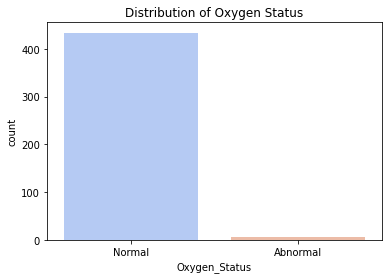

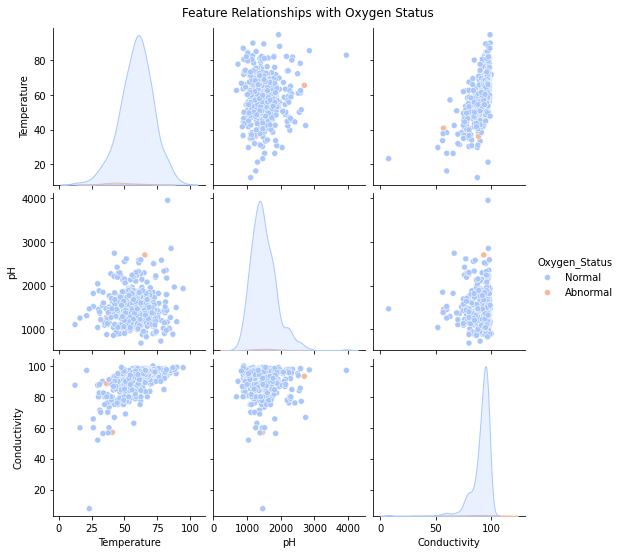

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Oxygen_Status
plt.figure(figsize=(6, 4))
sns.countplot(data=water_data, x="Oxygen_Status", palette="coolwarm")
plt.title("Distribution of Oxygen Status")
plt.show()

# Pairplot for features with Oxygen_Status
sns.pairplot(water_data, hue="Oxygen_Status", vars=["Temperature", "pH", "Conductivity"], palette="coolwarm")
plt.suptitle("Feature Relationships with Oxygen Status", y=1.02)
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99        86

    accuracy                           0.98        88
   macro avg       0.49      0.50      0.49        88
weighted avg       0.96      0.98      0.97        88



C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

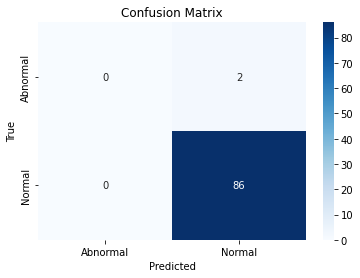

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into features and target variable
X = water_data[["Temperature", "pH", "Conductivity"]]
y = water_data["Oxygen_Status"]

# Convert target variable to binary encoding
y = (y == "Normal").astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Abnormal", "Normal"], yticklabels=["Abnormal", "Normal"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


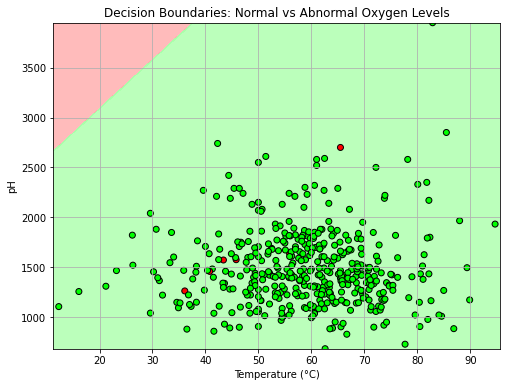

In [25]:
from matplotlib.colors import ListedColormap

# Select two features for visualization
X_vis = X[["Temperature", "pH"]].values
y_vis = y.values

# Fit a model on the selected features
model_vis = LogisticRegression()
model_vis.fit(X_vis, y_vis)

# Create a mesh grid for visualization
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict over the mesh grid
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#FFAAAA", "#AAFFAA"]))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor="k", cmap=ListedColormap(["#FF0000", "#00FF00"]))
plt.title("Decision Boundaries: Normal vs Abnormal Oxygen Levels")
plt.xlabel("Temperature (°C)")
plt.ylabel("pH")
plt.grid()
plt.show()
